<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Required-Packages" data-toc-modified-id="Importing-Required-Packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Required Packages</a></span></li><li><span><a href="#Reading-Data" data-toc-modified-id="Reading-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Reading Data</a></span></li><li><span><a href="#Exploring-High-Expectation-Features" data-toc-modified-id="Exploring-High-Expectation-Features-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploring High Expectation Features</a></span><ul class="toc-item"><li><span><a href="#Numeric-Features-Correlation" data-toc-modified-id="Numeric-Features-Correlation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Numeric Features Correlation</a></span><ul class="toc-item"><li><span><a href="#Exploring-2ndFlrSF-as-per-notes" data-toc-modified-id="Exploring-2ndFlrSF-as-per-notes-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Exploring 2ndFlrSF as per notes</a></span></li></ul></li><li><span><a href="#Numeric-Features-Importances" data-toc-modified-id="Numeric-Features-Importances-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Numeric Features Importances</a></span></li><li><span><a href="#Categorical-Feature-Importances" data-toc-modified-id="Categorical-Feature-Importances-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Categorical Feature Importances</a></span><ul class="toc-item"><li><span><a href="#Making-Dummies-for-Categorical-Variables" data-toc-modified-id="Making-Dummies-for-Categorical-Variables-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Making Dummies for Categorical Variables</a></span></li><li><span><a href="#Label-Encoding-Categorical-Variables" data-toc-modified-id="Label-Encoding-Categorical-Variables-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Label Encoding Categorical Variables</a></span></li></ul></li></ul></li><li><span><a href="#Strong-Features" data-toc-modified-id="Strong-Features-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Strong Features</a></span></li><li><span><a href="#End-Comments" data-toc-modified-id="End-Comments-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>End Comments</a></span></li></ul></div>

# Importing Required Packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm

from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

import statsmodels.graphics.tsaplots as sgt

import warnings
warnings.filterwarnings("ignore")

# Reading Data

In [2]:
backup_train = pd.read_csv("../Data/train.csv")
backup_test = pd.read_csv("../Data/test.csv")

train_df = backup_train.copy()
test_df = backup_test.copy()

In [3]:
categorical = [
    "ExterQual", "Foundation", "BsmtQual", 
    "FireplaceQu", "GarageFinish", "KitchenQual"
]

ordinal = [
    "FullBath", "GarageCars", "TotRmsAbvGrd", 
    "OverallQual", "OverallCond"
]

numeric = [
    "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", 
    "GrLivArea", "GarageArea"
]

time = [
    "YearBuilt", "YearRemodAdd", "MoSold", "YrSold"
]

target = ["SalePrice"]

features = categorical + ordinal + numeric + time

train_high_df = train_df[features]
train_high_df["YearDiff"] = train_df["YrSold"] - train_df["YearBuilt"]
train_high_df["SalePrice"] = train_df["SalePrice"]

print(train_high_df.shape)

train_high_df.head()

(1460, 22)


,ExterQual,Foundation,BsmtQual,FireplaceQu,GarageFinish,KitchenQual,FullBath,GarageCars,TotRmsAbvGrd,OverallQual,...,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,YearBuilt,YearRemodAdd,MoSold,YrSold,YearDiff,SalePrice
0,Gd,PConc,Gd,NaN,RFn,Gd,2,2,8,7,...,856,854,1710,548,2003,2003,2,2008,5,208500
1,TA,CBlock,Gd,TA,RFn,TA,2,2,6,6,...,1262,0,1262,460,1976,1976,5,2007,31,181500
2,Gd,PConc,Gd,TA,RFn,Gd,2,2,6,7,...,920,866,1786,608,2001,2002,9,2008,7,223500
3,TA,BrkTil,TA,Gd,Unf,Gd,1,3,7,7,...,961,756,1717,642,1915,1970,2,2006,91,140000
4,Gd,PConc,Gd,TA,RFn,Gd,2,3,9,8,...,1145,1053,2198,836,2000,2000,12,2008,8,250000


# Exploring High Expectation Features

## Numeric Features Correlation 

**Heatmap with all numeric like features**

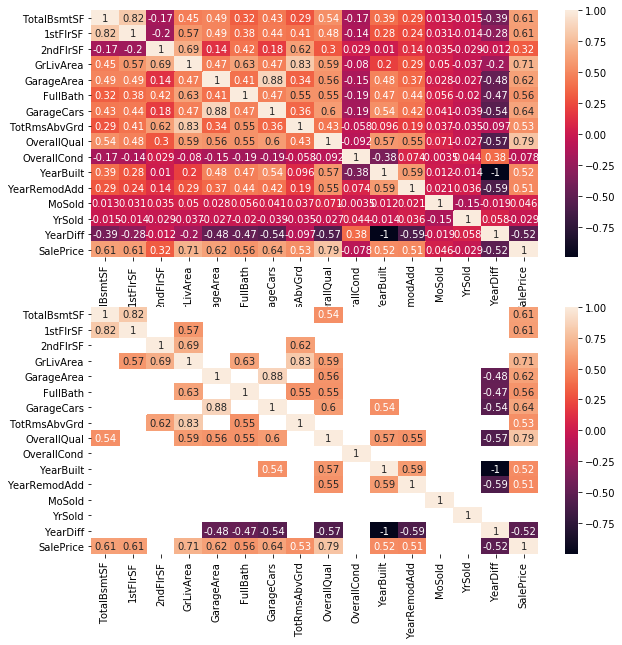

In [4]:
fig, ax = plt.subplots(2, 1, figsize = (10, 10))

sns.heatmap(train_high_df[numeric + ordinal + time + ["YearDiff"] + target].corr(), 
            annot = True, ax = ax[0])

mask = (train_high_df[numeric + ordinal + time + ["YearDiff"] + target].corr() < 0.5) & (train_high_df[numeric + ordinal + time + ["YearDiff"] + target].corr() > -0.4)

sns.heatmap(train_high_df[numeric + ordinal + time + ["YearDiff"] + target].corr(), 
            annot = True, ax = ax[1],
            mask = mask)
plt.show()

**Multicollinearity detected in:**
- TotalBsmtSF & 1stFlrSF
- GarageArea & GarageCars
- YearBuilt & YearDiff
- GrLivArea & TotRmsAbvGrd

### Exploring 2ndFlrSF as per notes

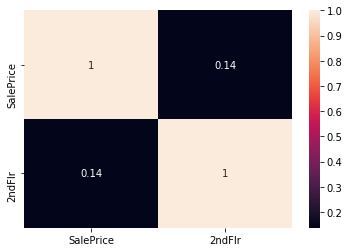

In [5]:
df = train_df[["SalePrice"]]

df["2ndFlr"] = np.where(train_high_df["2ndFlrSF"] > 0, 1, 0)

sns.heatmap(df.corr(), annot = True)
plt.show()

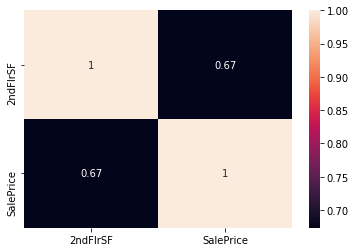

In [6]:
df = train_high_df[train_high_df["2ndFlrSF"]>0][["2ndFlrSF", "SalePrice"]]

sns.heatmap(df.corr(), annot = True)

plt.show()

**Adding the factor variable into the dataframe that indicates whether we have a second floor or not**

In [7]:
train_high_df["2ndFlr"] = np.where(train_high_df["2ndFlrSF"]>0, 1, 0)

**Checking the heatmap again**

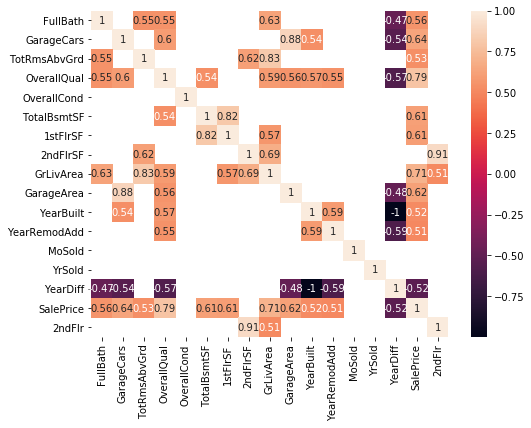

In [8]:
fig, ax = plt.subplots(figsize = (8, 6))

sns.heatmap(train_high_df.drop(categorical, axis = 1).corr(), annot = True, 
            mask = (train_high_df.drop(categorical, axis = 1).corr()<0.5) & (train_high_df.drop(categorical, axis = 1).corr()>-0.4))

plt.show()

## Numeric Features Importances

**f_regression**

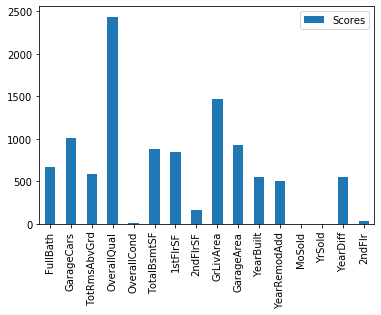

In [9]:
X, y = train_high_df.drop(categorical + target, axis = 1), train_high_df[target]

fs = SelectKBest(score_func = f_regression, k = "all")
fs.fit(X.values, y.values)

pd.DataFrame({"Scores": fs.scores_}, index = X.columns).plot.bar()
plt.show()

**mutual_info_regression**

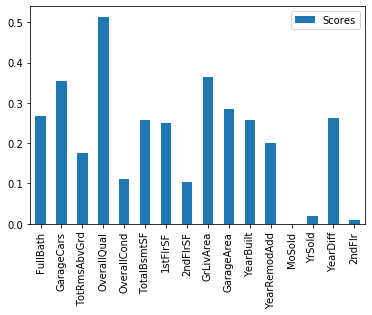

In [10]:
X, y = train_high_df.drop(categorical + target, axis = 1), train_high_df[target]

fs = SelectKBest(score_func = mutual_info_regression, k = "all")
fs.fit(X.values, y.values)

pd.DataFrame({"Scores": fs.scores_}, index = X.columns).plot.bar()
plt.show()

## Categorical Feature Importances

### Making Dummies for Categorical Variables 

**f_regression**

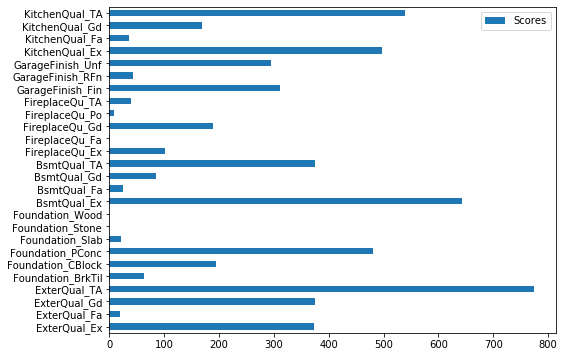

In [11]:
X, y = pd.get_dummies(train_high_df[categorical]), train_high_df[target]

fs = SelectKBest(score_func = f_regression, k = "all")
fs.fit(X.values, y.values)

pd.DataFrame({"Scores": fs.scores_}, index = X.columns).plot.barh(figsize = (8, 6))
plt.show()

**mutual_info_regression**

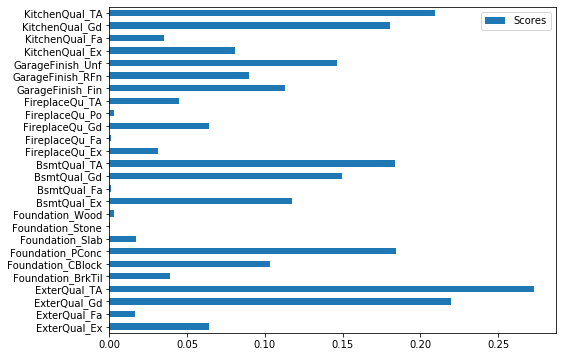

In [12]:
X, y = pd.get_dummies(train_high_df[categorical]), train_high_df[target]

fs = SelectKBest(score_func = mutual_info_regression, k = "all")
fs.fit(X.values, y.values)

pd.DataFrame({"Scores": fs.scores_}, index = X.columns).plot.barh(figsize = (8, 6))
plt.show()

### Label Encoding Categorical Variables

In [13]:
df = train_high_df[categorical]

df["ExterQual"] = df["ExterQual"].map({"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4})

df["Foundation"] = df["Foundation"].map({
    "Slab": 1, "BrkTil": 2, "CBlock": 3,
    "Stone": 4, "Wood": 5, "PConc": 6
})

df["BsmtQual"] = df["BsmtQual"].fillna("NA")
df["BsmtQual"] = df["BsmtQual"].map({"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5})

df["FireplaceQu"] = df["FireplaceQu"].fillna("NA")
df["FireplaceQu"] = df["FireplaceQu"].map({"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5})

df["GarageFinish"] = df["GarageFinish"].fillna("NA")
df["GarageFinish"] = df["GarageFinish"].map({"NA": 0, "Unf": 1, "RFn": 2, "Fin": 3})

df["KitchenQual"] = df["KitchenQual"].map({"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4})

**f_regression**

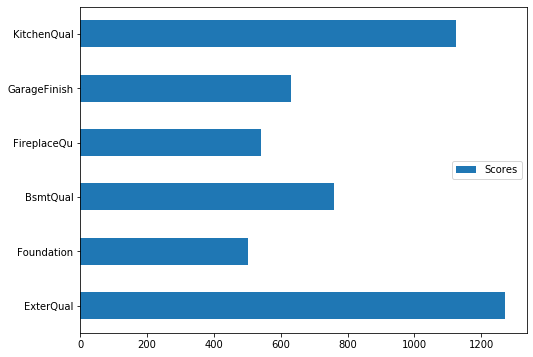

In [14]:
X, y = df, train_high_df[target]

fs = SelectKBest(score_func = f_regression, k = "all")
fs.fit(X.values, y.values)

pd.DataFrame({"Scores": fs.scores_}, index = X.columns).plot.barh(figsize = (8, 6))
plt.show()

**mutual_info_regression**

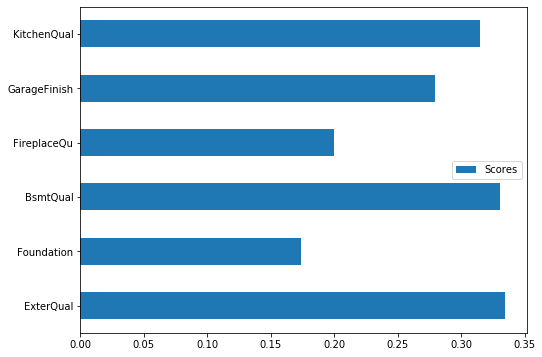

In [15]:
X, y = df, train_high_df[target]

fs = SelectKBest(score_func = mutual_info_regression, k = "all")
fs.fit(X.values, y.values)

pd.DataFrame({"Scores": fs.scores_}, index = X.columns).plot.barh(figsize = (8, 6))
plt.show()

# Strong Features

In [16]:
df = train_high_df.copy()

df["ExterQual"] = df["ExterQual"].map({"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4})

df["Foundation"] = df["Foundation"].map({
    "Slab": 1, "BrkTil": 2, "CBlock": 3,
    "Stone": 4, "Wood": 5, "PConc": 6
})

df["BsmtQual"] = df["BsmtQual"].fillna("NA")
df["BsmtQual"] = df["BsmtQual"].map({"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5})

df["FireplaceQu"] = df["FireplaceQu"].fillna("NA")
df["FireplaceQu"] = df["FireplaceQu"].map({"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5})

df["GarageFinish"] = df["GarageFinish"].fillna("NA")
df["GarageFinish"] = df["GarageFinish"].map({"NA": 0, "Unf": 1, "RFn": 2, "Fin": 3})

df["KitchenQual"] = df["KitchenQual"].map({"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4})

df["GarageCars"] = df["GarageCars"].fillna(0)

strong_features = [
                "1stFlrSF", "GrLivArea", "GarageCars", "FullBath", 
                "OverallQual", "YearRemodAdd", "YearDiff",
                "KitchenQual", "GarageFinish", "FireplaceQu", 
                "BsmtQual", "Foundation", "ExterQual"
                ]

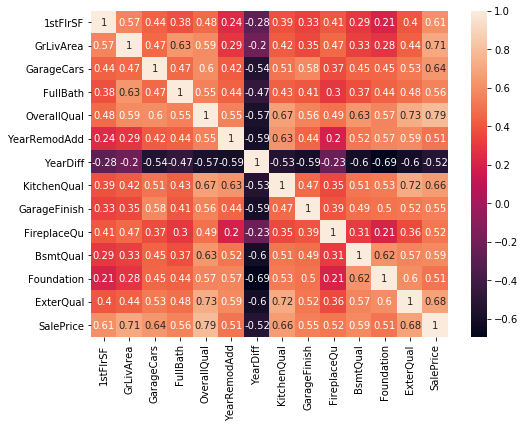

In [17]:
fig, ax = plt.subplots(figsize = (8, 6))
sns.heatmap(df[strong_features+target].corr(), annot = True)
plt.show()

# End Comments

- All features in [Strong Features Section](#Strong-Features) should be used in the submission phase
- Try to add the '2ndFlrSF' and '2ndFlr' features from [this section](#Exploring-2ndFlrSF-as-per-notes) and test their performance in the submission phase